In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:

bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [5]:
!wget https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Train.zip
!unzip CAX_Characters_Train.zip

--2019-06-07 17:45:37--  https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190442283 (182M) [application/zip]
Saving to: ‘CAX_Characters_Train.zip’

CAX_Characters_Trai 100%[===================>] 181.62M  51.1MB/s    in 3.6s    

2019-06-07 17:45:41 (51.1 MB/s) - ‘CAX_Characters_Train.zip’ saved [190442283/190442283]

Archive:  CAX_Characters_Train.zip
   creating: CAX_Characters_Train/
   creating: CAX_Characters_Train/angrybirds/
  inflating: CAX_Characters_Train/angrybirds/Cax_train1.jpg  
  inflating: CAX_Characters_Train/angrybirds/Cax_train10.jpg  
  inflating: CAX_Characters_Train/angrybirds/Cax_train100.jpg  
  inflating: CAX_Characters_Train/angrybirds/Cax_train101.jpg  
  inflating: CAX_Charac

In [0]:
path = Path('/content/')

In [7]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/CAX_Characters_Train'),
 PosixPath('/content/CAX_Characters_Train.zip'),
 PosixPath('/content/data'),
 PosixPath('/content/models')]

In [0]:
np.random.seed(99)

In [0]:
tfms = get_transforms(do_flip=False,max_lighting=0.4)
data = ImageDataBunch.from_folder(path,valid_pct = 0.2, ds_tfms=tfms, size=300).normalize()

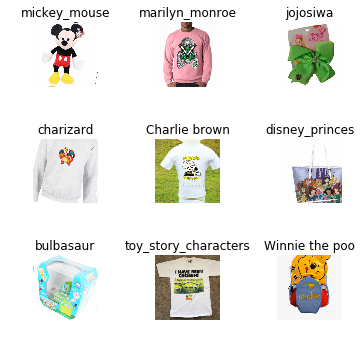

In [16]:
data.show_batch(rows=3, figsize=(5,5))

In [17]:
print(data.classes)
len(data.classes),data.c

['Baloo', 'Bart simpson', 'Charlie brown', 'Chicken_little', 'Cinderella', 'Godzilla', 'Goku_1', 'John Cena', 'R2-D2', 'Roman Reigns', 'Scoopy Doo', 'SpongeBob SquarePants', 'Tom and Jerry', 'Winnie the poo', 'angrybirds', 'ben', 'bulbasaur', 'charizard', 'charmander', 'darth_vader', 'disney_princes', 'donald_duck', 'goofy', 'han-solo', 'harry_potter', 'hellokitty', 'itachi', 'jojosiwa', 'kakashi', 'marilyn_monroe', 'mickey_mouse', 'minions', 'naruto', 'pikachu', 'pokemon', 'popeye', 'power_rangers', 'squirtle', 'teenage_mutant', 'toy_story_characters', 'vampirina', 'vegeta']


(42, 42)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
#learn.fit(2)

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.673173,1.691279,0.545590,01:54
1,1.687411,1.185415,0.670404,01:51
2,1.160010,0.977196,0.730194,01:50
3,0.843379,0.937743,0.738416,01:50


In [0]:
learn.save('stage_1_caxcomp_norm')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

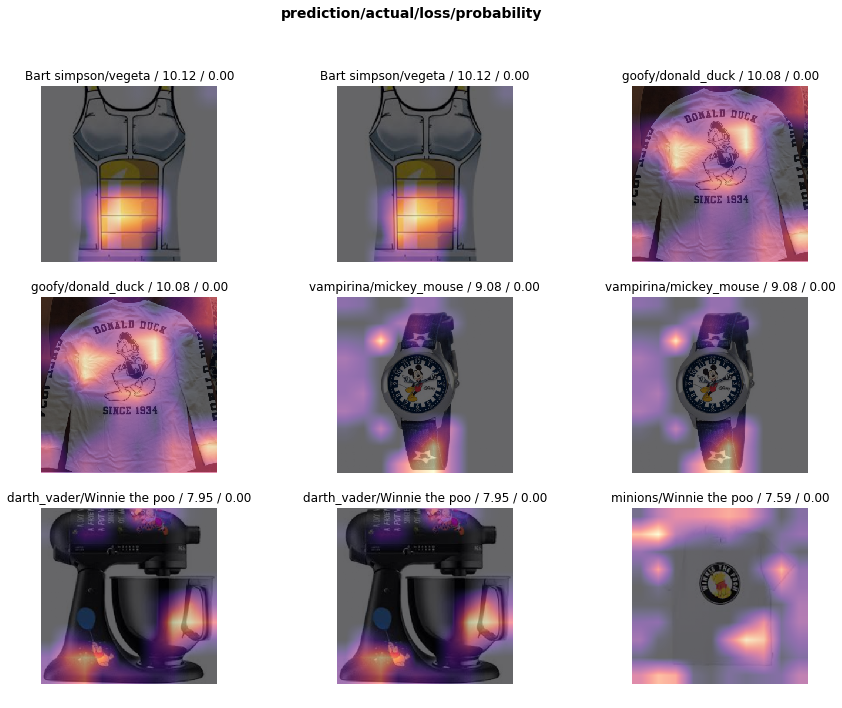

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

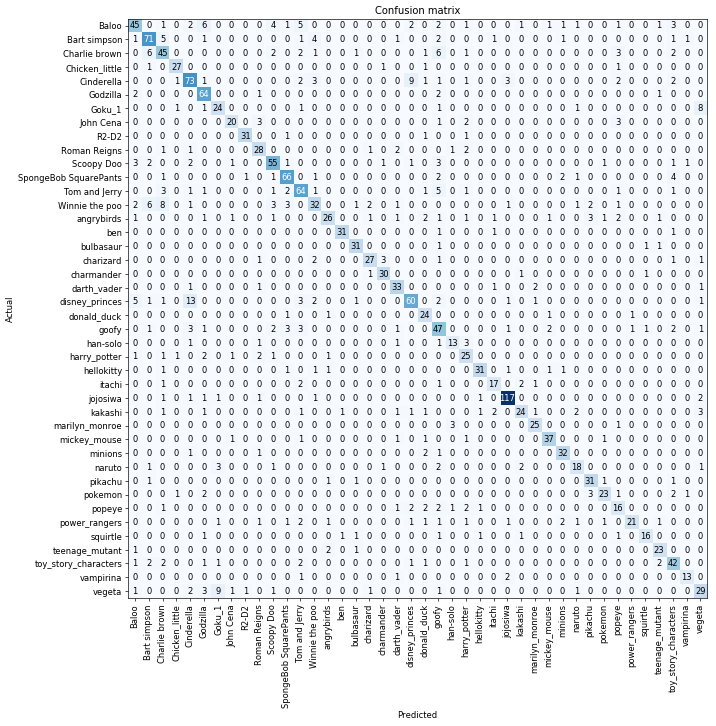

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=3)

[('disney_princes', 'Cinderella', 22),
 ('vegeta', 'Goku_1', 10),
 ('Goku_1', 'vegeta', 9),
 ('Cinderella', 'disney_princes', 8),
 ('SpongeBob SquarePants', 'toy_story_characters', 8),
 ('Tom and Jerry', 'Baloo', 8),
 ('Bart simpson', 'Charlie brown', 7),
 ('Charlie brown', 'Bart simpson', 6),
 ('Charlie brown', 'SpongeBob SquarePants', 6),
 ('Cinderella', 'toy_story_characters', 6),
 ('Scoopy Doo', 'Winnie the poo', 5),
 ('disney_princes', 'Baloo', 5),
 ('John Cena', 'popeye', 4),
 ('Scoopy Doo', 'Charlie brown', 4),
 ('Tom and Jerry', 'Charlie brown', 4),
 ('goofy', 'Cinderella', 4),
 ('goofy', 'Godzilla', 4),
 ('teenage_mutant', 'bulbasaur', 4),
 ('Baloo', 'Tom and Jerry', 3),
 ('Godzilla', 'Roman Reigns', 3),
 ('Scoopy Doo', 'disney_princes', 3),
 ('Tom and Jerry', 'Bart simpson', 3),
 ('Tom and Jerry', 'Godzilla', 3),
 ('goofy', 'Roman Reigns', 3),
 ('goofy', 'pikachu', 3),
 ('harry_potter', 'John Cena', 3),
 ('vegeta', 'Godzilla', 3)]

In [0]:
learn.lr_find(start_lr=1e-10, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
?learn.lr_find()

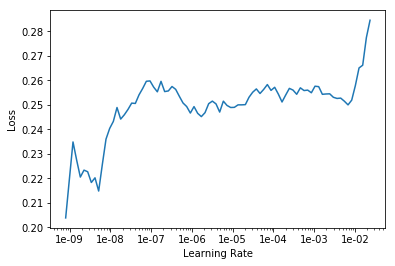

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.241153,0.329834,0.912351,03:46
1,0.236194,0.304865,0.923307,03:44
2,0.184838,0.301495,0.921813,03:44
3,0.136067,0.258910,0.936255,03:44
4,0.119354,0.251532,0.936753,03:44
5,0.076597,0.236895,0.940239,03:43
6,0.059308,0.240627,0.945219,03:43
7,0.045843,0.235199,0.944223,03:44
8,0.036443,0.235290,0.944970,03:44
9,0.029922,0.234649,0.943974,03:43


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

epoch	train_loss	valid_loss	accuracy	time
0	0.336410	0.927190	0.737550	01:56
1	0.375802	0.821575	0.774900	01:57
2	0.225349	0.664727	0.814741	01:59
3	0.126733	0.646136	0.823705	01:59

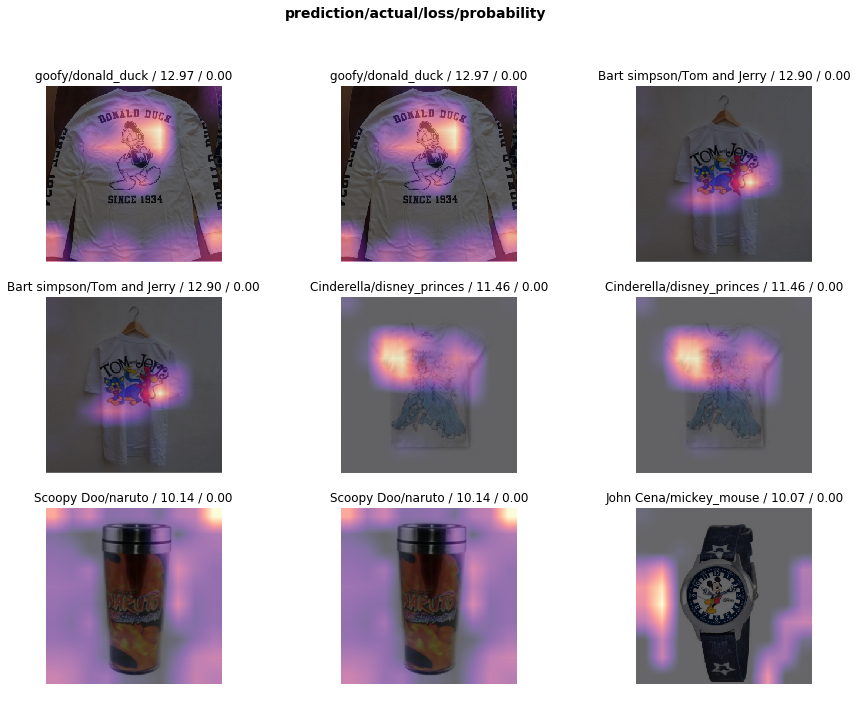

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=3)

[('disney_princes', 'Cinderella', 15),
 ('Cinderella', 'disney_princes', 10),
 ('SpongeBob SquarePants', 'toy_story_characters', 6),
 ('vegeta', 'Goku_1', 5),
 ('Charlie brown', 'Bart simpson', 4),
 ('John Cena', 'power_rangers', 4),
 ('goofy', 'Cinderella', 4),
 ('teenage_mutant', 'bulbasaur', 4),
 ('Bart simpson', 'Charlie brown', 3),
 ('vampirina', 'jojosiwa', 3)]